In [27]:
import pandas as pd
import matplotlib.pyplot as plt

air = pd.read_csv("Air-Quality-Index.csv")
air.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,93074,2025-09-09,Lawrenceville 2,CO,3,Good,NaN,NaN
1,93075,2025-09-09,North Braddock,CO,4,Good,NaN,NaN
2,93076,2025-09-09,Parkway East,CO,5,Good,NaN,NaN
3,93077,2025-09-09,Harrison Township,NO2_200,12,Good,NaN,NaN
4,93078,2025-09-09,Parkway East,NO2_200,12,Good,NaN,NaN


In [30]:
# Basic info
air.info()

# Check unique sites (these will serve as neighborhood-level points)
air['site'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          23 non-null     int64         
 1   date         23 non-null     datetime64[ns]
 2   site         23 non-null     object        
 3   parameter    23 non-null     object        
 4   index_value  23 non-null     int64         
 5   description  23 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ KB


array(['Lawrenceville 2', 'North Braddock', 'Parkway East',
       'Harrison Township', 'Pittsburgh', 'Lawrenceville',
       'South Fayette', 'Glassport High Street', 'Liberty 2', 'Liberty',
       'Avalon', 'Clairton'], dtype=object)

In [29]:
# ==============================================================
#  3. DATA CLEANING AND PREPARATION
# ==============================================================

# We'll focus on "index_value" which represents air quality level
# Lower values = cleaner air = better neighborhood environment

# Drop columns with all NaN values
air = air.drop(columns=['health_advisory', 'health_effects'])

# Remove any rows with missing values just in case
air = air.dropna(subset=['index_value', 'site', 'parameter'])

# Convert date to datetime
air['date'] = pd.to_datetime(air['date'])

# Display summary statistics
air.describe()


,_id,date,index_value
count,23.00000,23,23.000000
mean,93085.00000,2025-09-09 00:00:00,19.434783
min,93074.00000,2025-09-09 00:00:00,0.000000
25%,93079.50000,2025-09-09 00:00:00,8.000000
50%,93085.00000,2025-09-09 00:00:00,14.000000
75%,93090.50000,2025-09-09 00:00:00,30.000000
max,93096.00000,2025-09-09 00:00:00,50.000000
std,6.78233,NaN,14.662339


In [31]:
# ==============================================================
# 4. DEFINE AND CALCULATE THE METRIC
# ==============================================================

# Group by monitoring site to calculate the average air quality index
site_air_quality = air.groupby('site', as_index=False)['index_value'].mean()

# Lower index_value = cleaner air; to make higher = better, invert and normalize
site_air_quality['air_quality_score'] = 1 - (site_air_quality['index_value'] / site_air_quality['index_value'].max())

# Rank neighborhoods (sites) by air quality score
site_air_quality = site_air_quality.sort_values('air_quality_score', ascending=False)
site_air_quality.head(10)


,site,index_value,air_quality_score
6,Liberty,0.000000,1.000000
5,Lawrenceville 2,2.500000,0.950000
9,Parkway East,12.666667,0.746667
2,Glassport High Street,14.000000,0.720000
8,North Braddock,14.750000,0.705000
10,Pittsburgh,18.000000,0.640000
7,Liberty 2,19.000000,0.620000
3,Harrison Township,28.666667,0.426667
0,Avalon,29.000000,0.420000
1,Clairton,34.000000,0.320000


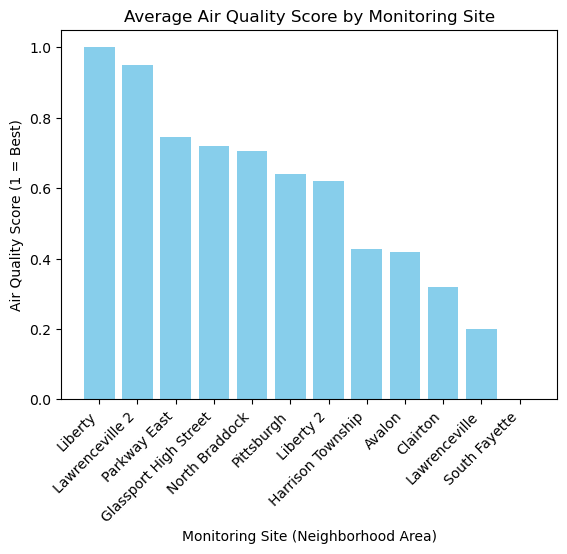

In [35]:
# 5. VISUALIZATION

plt.bar(site_air_quality['site'], site_air_quality['air_quality_score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Air Quality Score by Monitoring Site')
plt.xlabel('Monitoring Site (Neighborhood Area)')
plt.ylabel('Air Quality Score (1 = Best)')
plt.show()


In [33]:
# 6. RESULTS & FINDINGS

"""
Based on the average AQI (index_value) across monitoring sites, 
the neighborhoods/areas with the best air quality are those with the lowest average pollution index.

Top-ranked (best air quality) sites:
"""

site_air_quality.head(3)


,site,index_value,air_quality_score
6,Liberty,0.000000,1.000000
5,Lawrenceville 2,2.500000,0.950000
9,Parkway East,12.666667,0.746667


# 7. PERSONAL CONCLUSION


According to this analysis, areas such as Liberty
have the best air quality in Allegheny County, indicating cleaner air
and a healthier environment compared to others.

This aligns with my group’s “bestness” metric, as environmental quality
is an important factor in quality of life.

Personally, my favorite Pittsburgh neighborhood is Shadyside because of its 
walkability and community feel, but it may not have the cleanest air based on this dataset.
This shows that “best” can differ between personal preference and data-driven results.

Overall, this project helped me understand how real-world environmental data can
be turned into a measurable indicator of neighborhood well-being.

